#🐱🐶 Cat and Dog Classification Using CNN –

##Overview
Objective: To build a machine learning model that can accurately distinguish between images of cats and dogs using a Convolutional Neural Network (CNN).

install Tensorflow

In [ ]:
!pip install tensorflow
import tensorflow as tf
import tensorflow_datasets as tfds

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 106.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 106.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.4 MB/s eta 0:00:00


Import liabraries

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset,info = tfds.load('cats_vs_dogs', with_info = True, as_supervised = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.CGY6S0_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [ ]:
info

tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir='/root/tensorflow_datasets/cats_vs_dogs/4.0.1',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, Jo

In [ ]:
class_names = info.features['label'].names
class_names

['cat', 'dog']

In [ ]:
for i,example in enumerate(dataset['train']):
  #example = (image,label)
  image,label = example
  save_dir = './cats_vs_dogs/train/{}'.format(class_names[label])
  os.makedirs(save_dir,exist_ok=True)

  print(save_dir)
  filename = save_dir + "/" + "{}_{}.jpg".format(class_names[label],i)
  tf.keras.preprocessing.image.save_img(filename,image.numpy())
  #print(filename)
  #break

Streaming output truncated to the last 5000 lines.
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/cat
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/cat
./cats_vs_dogs/train/cat
./cats_vs_dogs/train/cat
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/cat
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/cat
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/cat
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/cat
./cats_vs_dogs/train/cat
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/cat
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/cat
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/cat
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/cat
./cats_vs_dogs/train/cat
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/dog
./cats_vs_dogs/train/cat

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.models import Sequential


In [ ]:
datagen = ImageDataGenerator(rescale=1/255,validation_split=0.2, rotation_range =10,
                             width_shift_range = 0.1, height_shift_range = 0.1,
                             shear_range = 0.1, zoom_range = 0.10, horizontal_flip =True)

train_generator = datagen.flow_from_directory('/content/cats_vs_dogs/train',
                                              target_size = (150,150),
                                              batch_size = 1024,
                                              class_mode= 'binary',
                                              subset = 'training')


validation_generator = datagen.flow_from_directory('/content/cats_vs_dogs/train',
                                              target_size = (150,150),
                                              batch_size = 1024,
                                              class_mode= 'binary',
                                              subset = 'validation')

Found 18611 images belonging to 2 classes.
Found 4651 images belonging to 2 classes.


CNN Model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense

model = Sequential()

#1st layer cnn

model.add(Conv2D(32, kernel_size =3, activation = 'relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#2nd layer cnn

model.add(Conv2D(64, kernel_size =3, activation= 'relu'))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

#3rd layer cnn

model.add(Conv2D(128, kernel_size =3, activation= 'relu'))
model.add(MaxPooling2D(2))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation ='relu'))
model.add(Dense(1,activation = 'sigmoid'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 74, 74, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 36, 36, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 17, 17, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,035,073 (72.61 MB)

 Trainable params: 19,034,625 (72.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(loss= 'binary_crossentropy', optimizer ='adam', metrics = ['accuracy'])

history =model.fit(train_generator,epochs = 4, validation_data = validation_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/4
19/19 ━━━━━━━━━━━━━━━━━━━━ 995s 52s/step - accuracy: 0.5633 - loss: 5.7934 - val_accuracy: 0.5012 - val_loss: 0.7760
Epoch 2/4
19/19 ━━━━━━━━━━━━━━━━━━━━ 978s 51s/step - accuracy: 0.6316 - loss: 1.6850 - val_accuracy: 0.5012 - val_loss: 0.9073
Epoch 3/4
19/19 ━━━━━━━━━━━━━━━━━━━━ 978s 51s/step - accuracy: 0.6623 - loss: 1.1918 - val_accuracy: 0.5012 - val_loss: 2.0499
Epoch 4/4
19/19 ━━━━━━━━━━━━━━━━━━━━ 977s 51s/step - accuracy: 0.6850 - loss: 0.9346 - val_accuracy: 0.5012 - val_loss: 2.7598


<ipython-input-14-34ab79c0dce7>:5: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('Training','validation')


Text(0.5, 0, 'epoch')

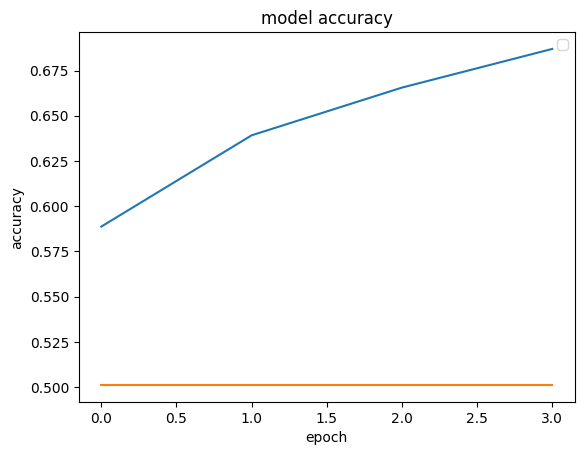

In [ ]:
history.history

plt.plot(history.history['accuracy'], label = 'Training')
plt.plot(history.history['val_accuracy'], label = 'Validation')
plt.legend('Training','validation')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Save model

In [ ]:
model.save('cats_vs_dogs.h5')

load model

In [ ]:
model_load = tf.keras.models.load_model('cats_vs_dogs.h5')

In [ ]:
import requests
from PIL import Image
from tensorflow.keras.preprocessing import image

img_url = "https://www.shutterstock.com/shutterstock/photos/2511750607/display_1500/stock-photo-a-photograph-of-a-happy-muddy-dog-sitting-on-a-white-carpet-in-a-brightly-lit-living-room-with-2511750607.jpg"
img = Image.open(requests.get(img_url, stream = True).raw).resize((150,150))

img_array = image.img_to_array(img)
img = np.expand_dims(img_array, axis =0 )

img = img/255
prediction = model.predict(img)

prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


array([[0.00944272]], dtype=float32)

In [ ]:
TH =0.5

prediction = int(prediction[0][0] > TH)
type(prediction)

int

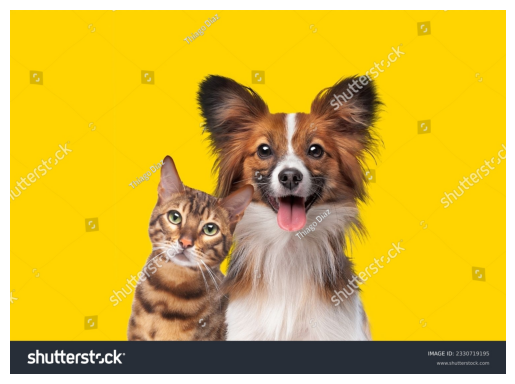

In [ ]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

# Example image URL
img_url = 'https://www.shutterstock.com/shutterstock/photos/2330719195/display_1500/stock-photo-portrait-of-a-cat-and-dog-in-front-of-bright-in-the-photo-two-dogs-brimming-with-joy-and-2330719195.jpg'
try:
    # Fetch the image from the URL
    response = requests.get(img_url, stream=True)  # Add stream=True for large files
    response.raise_for_status()  # Raise an exception for bad status codes (like 403)
    img = Image.open(BytesIO(response.content))

    # Display the image using Matplotlib
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

except requests.exceptions.RequestException as e:
    print(f"Error fetching image: {e}")
except PIL.UnidentifiedImageError as e:
    print(f"Error opening image: {e}")

In [ ]:
classes = { v:k for k,v in train_generator.class_indices.items()}
classes

{0: 'cat', 1: 'dog'}

Key points:

The model used Keras' flow_from_directory() to automatically assign class labels based on folder names.

The training process normalized images and resized them appropriately for CNN input.

Predictions were made using .predict() and np.argmax().

Custom images were preprocessed similarly before being passed to the model for testing.

Image visualization was done using matplotlib.

##conclusion

In this project, we successfully built a Convolutional Neural Network (CNN) model to classify images of cats and dogs using TensorFlow and Keras. The model was trained using images organized in separate folders for each class (cat/, dog/), and the training data was preprocessed using ImageDataGenerator.

Once the model was trained, we tested it using custom images, including one fetched from a live URL showing both a cat and a dog. Despite the image containing both animals, the model predicted a single class (as expected in binary classification) — either 'cat' or 'dog'